#IMPORTING THE REQUIRED LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold

#IMPORTING THE DATASET

In [2]:
df = pd.read_csv(r"cul_cat1.csv",index_col=[0])

#CHOOSING THE DATA WE ARE USING

In [3]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
col=[
    'peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B'
]
cd=df[col]
scaler = StandardScaler()
scale = scaler.fit_transform(cd)
cd_scale = pd.DataFrame(scale, columns = col)

In [4]:
!pip install umap

#PCA(principal component analysis) method

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pct=pca.fit_transform(cd_scale.values)
pca_cf = pd.DataFrame(data = pct, columns = ['x','y'])
pca_cf['repeater']=df['repeater_name']

<ipython-input-6-0020b3c5a732>:17: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['_','non-repeater','repeater'], fontsize=fs-2, loc='best')


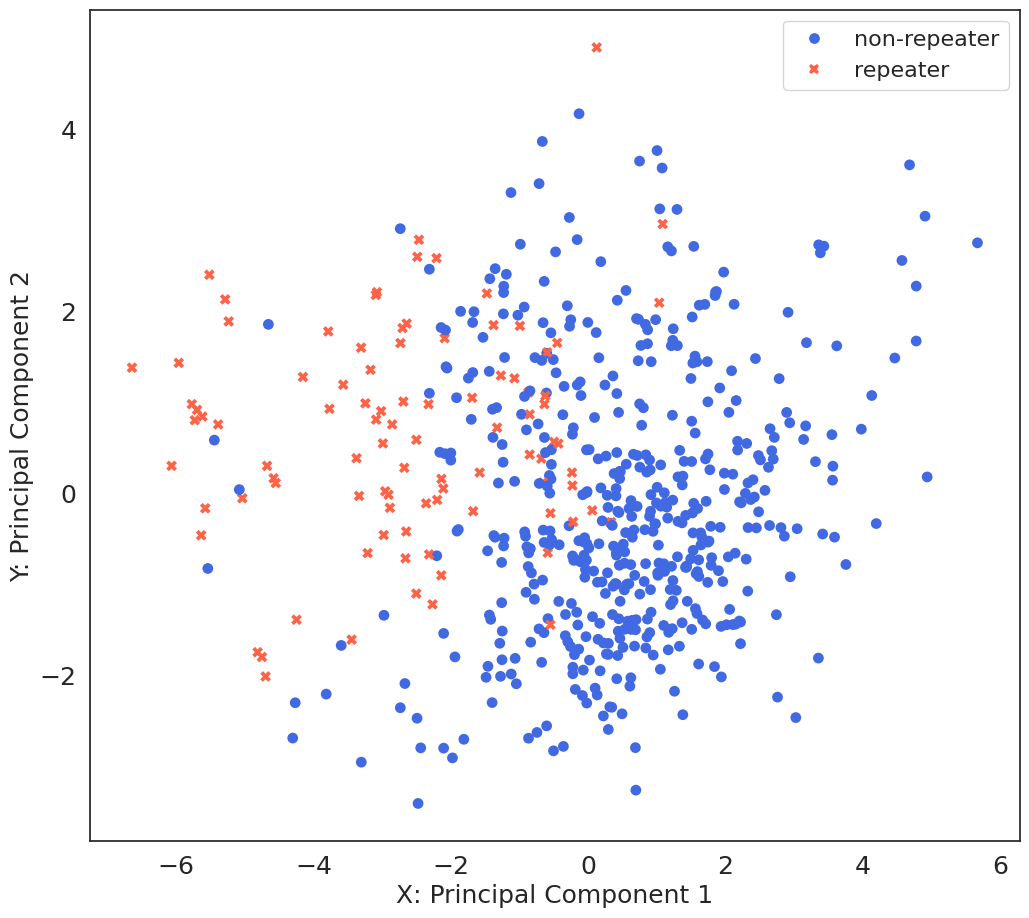

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create the directory if it doesn't exist
if not os.path.exists('./fig'):
    os.makedirs('./fig')

# Plot
p = 12
fs = 18
s = 5 * p
sns.set(context='notebook', style='white', rc={'figure.figsize':(p, 0.9 * p)})

color = ['royalblue', 'tomato']
sns.scatterplot(x='x', y='y', hue='repeater', style='repeater', data=pca_cf, linewidth=0, palette=color, s=s)
plt.legend(['_','non-repeater','repeater'], fontsize=fs-2, loc='best')
plt.xlabel('X: Principal Component 1', fontsize=fs)
plt.ylabel('Y: Principal Component 2', fontsize=fs)
plt.tick_params(labelsize=fs)

# Save the plot
plt.savefig(f'./fig/PCA.png', bbox_inches='tight', dpi=100, pad_inches=0.1)

# Show the plot
plt.show()


#for better and fast observations

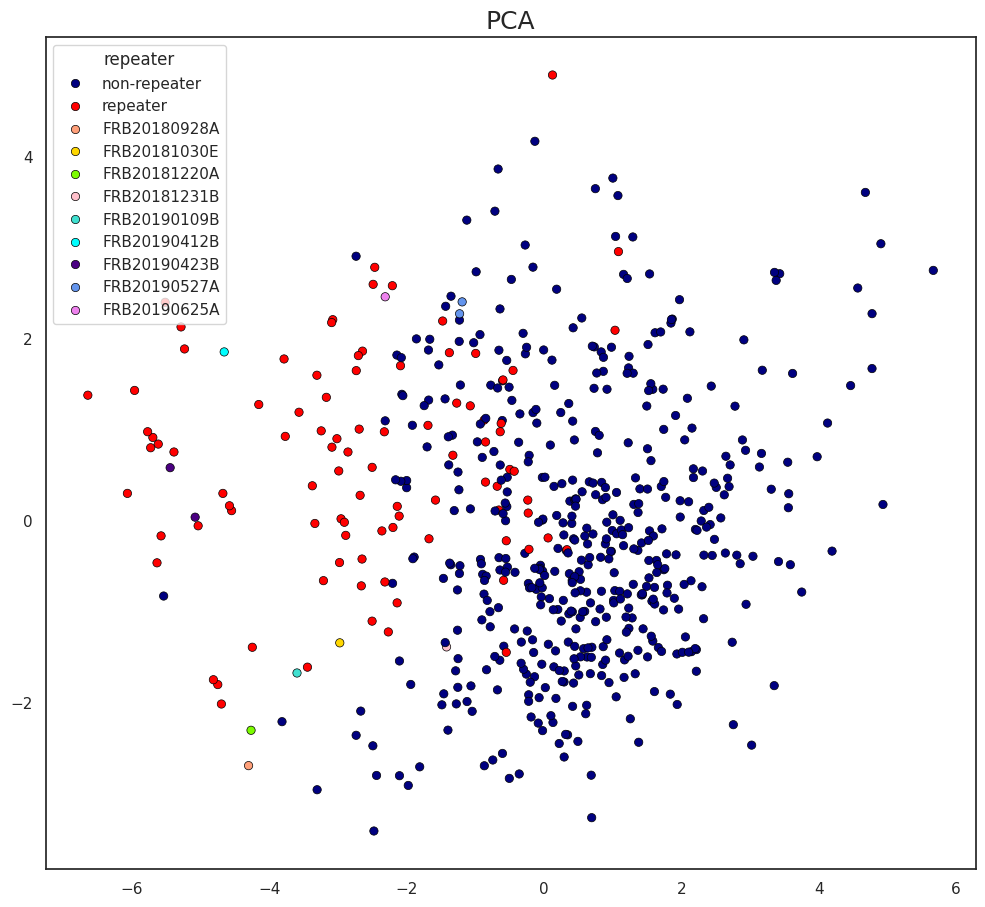

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
p = 12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p, 0.9*p)})

# Copy dataframe and add 'repeater' values
obs = pca_cf.copy()

# Ensure 'repeater' values are correctly filled
list = ["FRB20180928A", "FRB20181030E", "FRB20181220A", "FRB20190109B", "FRB20190412B",
        "FRB20190423B", "FRB20190625A", "FRB20181231B", "FRB20190527A"]
for l in list:
    obs.loc[np.ravel(np.where(df.loc[:,'tns_name'] == l)), 'repeater'] = l

# Fill missing 'repeater' values if necessary
obs['repeater'] = obs['repeater'].fillna('unknown')

# Set up color palette
color_obs = ['navy', 'red', 'lightsalmon', 'gold', 'lawngreen', 'pink', 'turquoise',
             'aqua', 'indigo', 'cornflowerblue', 'violet']

# Scatter plot without 'sizes' parameter
sns.scatterplot(x='x', y='y', data=obs, hue='repeater', palette=color_obs, edgecolor='black', linewidth=0.5)

# Set plot title and labels
plt.title('PCA', fontsize=18)
plt.xlabel(None, fontsize=18)
plt.ylabel(None, fontsize=18)

# Show plot
plt.show()


In [8]:
print(pca.components_)

[[ 0.00942375 -0.17564036  0.0477477  -0.07838234  0.38641738  0.37940487
  -0.26921517  0.42143307  0.46770732  0.44557693]
 [ 0.14099794  0.61023925 -0.22417478  0.27206954  0.26620318  0.22156067
   0.45009296  0.28033701  0.14014113 -0.25037205]]


In [9]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.40395752 0.20747851]
0.6114360340697264


In [10]:
pcavar=np.sqrt((pca.explained_variance_[0]*pca.components_[0])**2)+np.sqrt((pca.explained_variance_[1]*pca.components_[1])**2)
pca_al=pd.DataFrame()
pca_al['col']=col
pca_al['var1']=np.abs(pca.explained_variance_[0]*pca.components_[0])
pca_al['var2']=np.abs(pca.explained_variance_[1]*pca.components_[1])
pca_al['var']=pcavar

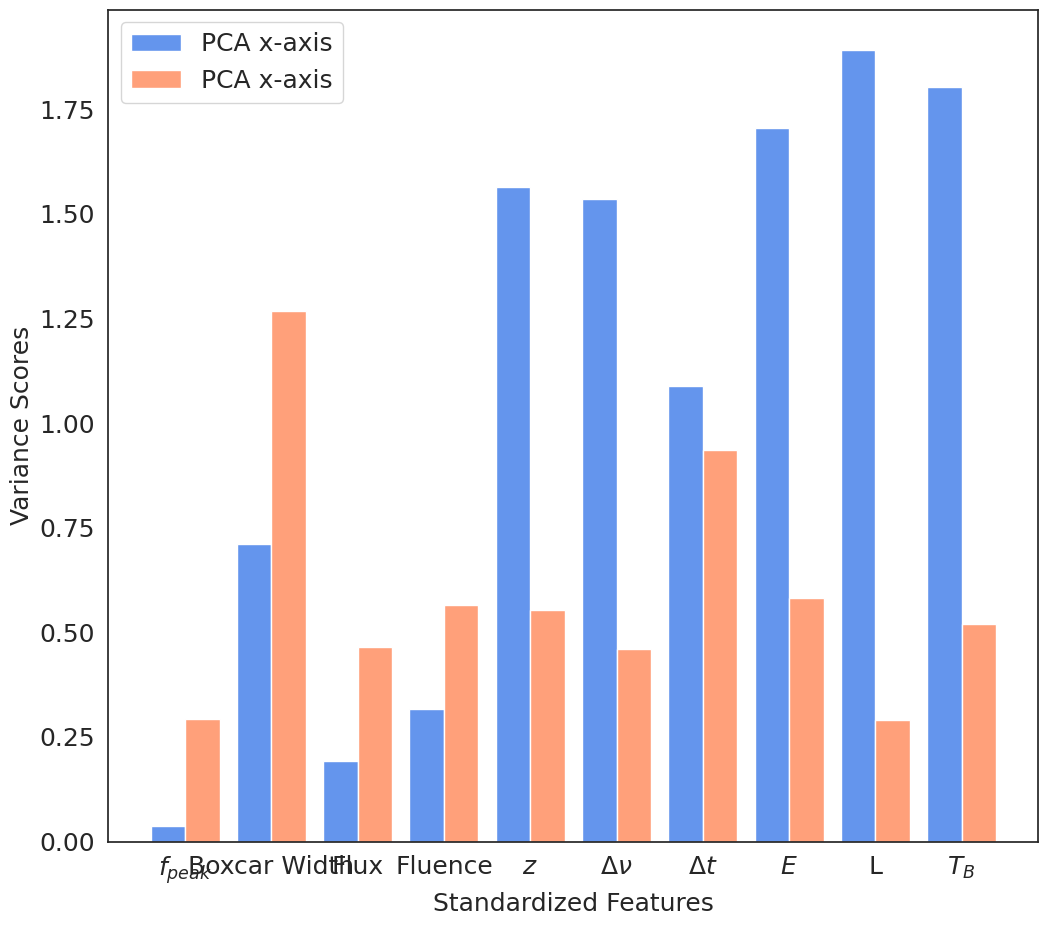

In [11]:
p=12
colx=['$f_{peak}$','Boxcar Width','Flux','Fluence','$z$',r'$\Delta \nu$','$\Delta t$','$E$','L','$T_B$']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(col))
fig,ax=plt.subplots()
rects1=ax.bar(x-width/2,pca_al['var1'],width,label='PCA x-axis',color='cornflowerblue')
rects2=ax.bar(x+width/2,pca_al['var2'],width,label='PCA x-axis',color='lightsalmon')
ax.legend(fontsize=fs)
#ax.set_title('Variances of Features in PCA',fontsize=fs)
ax.set_xlabel('Standardized Features',fontsize=fs)
ax.set_ylabel('Variance Scores',fontsize=fs)
plt.tick_params(labelsize=fs)
ax.set_xticks(x)
ax.set_xticklabels(colx)
plt.show()

#FINDING THE OPTIMUM VALUE OF K

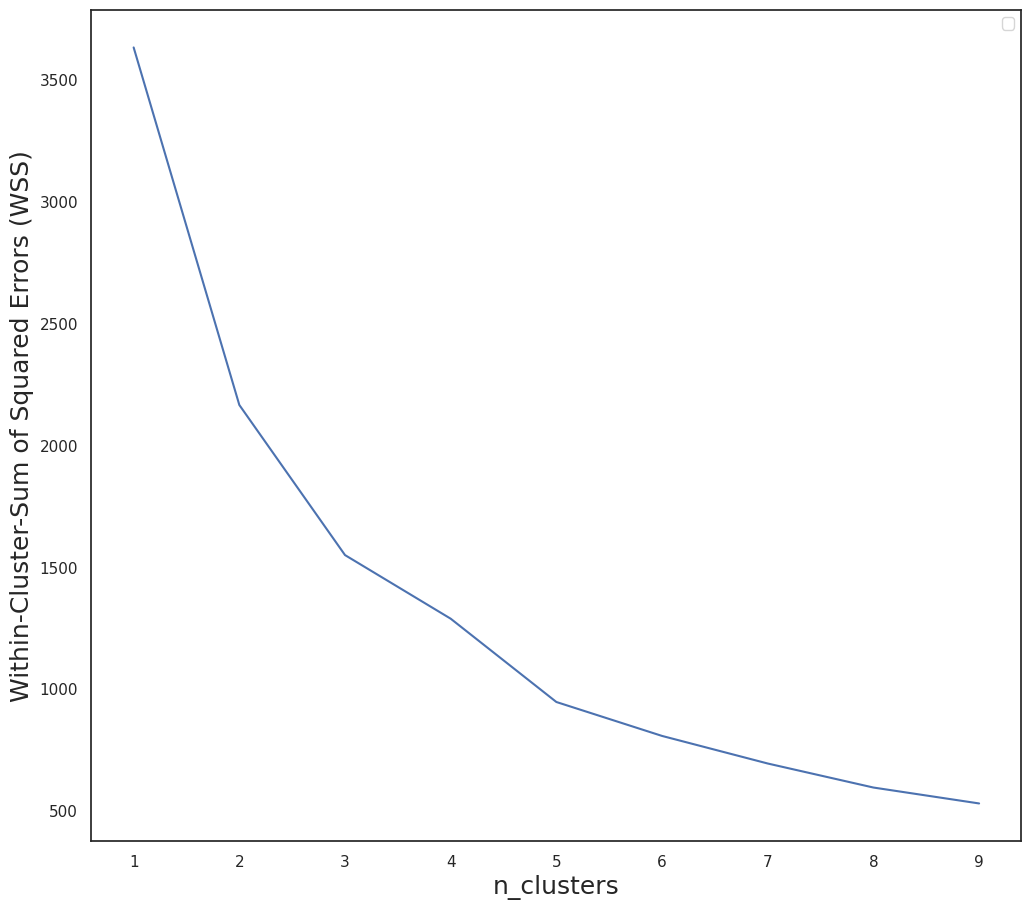

In [12]:
K=range(1,10)
wss = []
wss_pca=[]
for k in K:
    #kmeans=cluster.KMeans(n_clusters=k)
    #kmeans=kmeans.fit(cf_scale.values)
    #wss_iter = kmeans.inertia_
    #wss.append(wss_iter)
    kmeans_pca=cluster.KMeans(n_clusters=k)
    kmeans_pca=kmeans_pca.fit(pca_cf.loc[:,['x','y']])
    wss_iter_pca = kmeans_pca.inertia_
    wss_pca.append(wss_iter_pca)
p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
#plt.plot(K,wss,label='Raw data space')
plt.plot(K,wss_pca)
plt.legend()
plt.xlabel('n_clusters',fontsize=18)
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)',fontsize=18)
#plt.savefig(f'./fig/PCA Kmeans WSS.png',bbox_inches='tight',dpi=100,pad_inches=0.5)
plt.show()

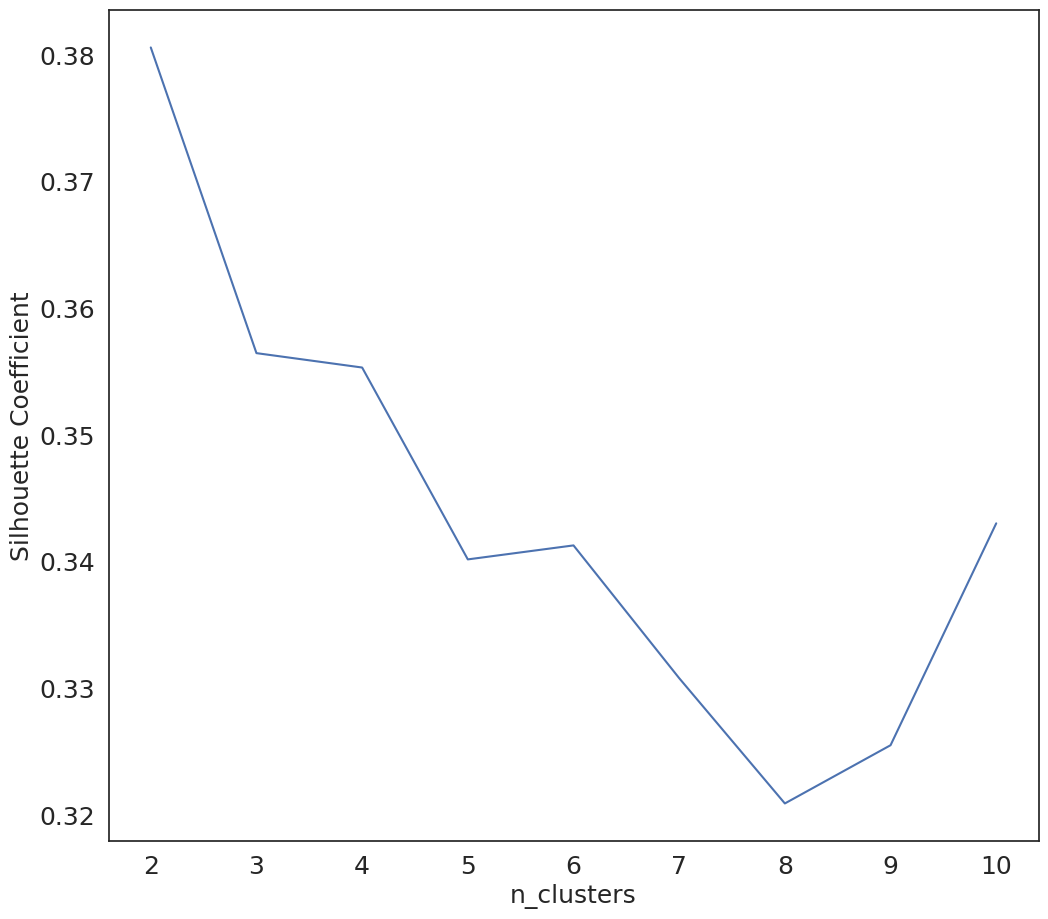

In [13]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
K=range(2,11)
si_pca=[]
si=[]
for i in K:
    si_pca_labels=cluster.KMeans(n_clusters=i).fit(pca_cf[['x','y']]).labels_
    t_pca=metrics.silhouette_score(pca_cf[['x','y']],labels=si_pca_labels)
    si_pca.append(t_pca)

p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
plt.plot(K,si_pca)
#plt.legend(fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlabel('n_clusters',fontsize=fs)
plt.ylabel('Silhouette Coefficient',fontsize=fs)
plt.savefig(f'./fig/PCA_Kmeans_Silhouette_Coefficient.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

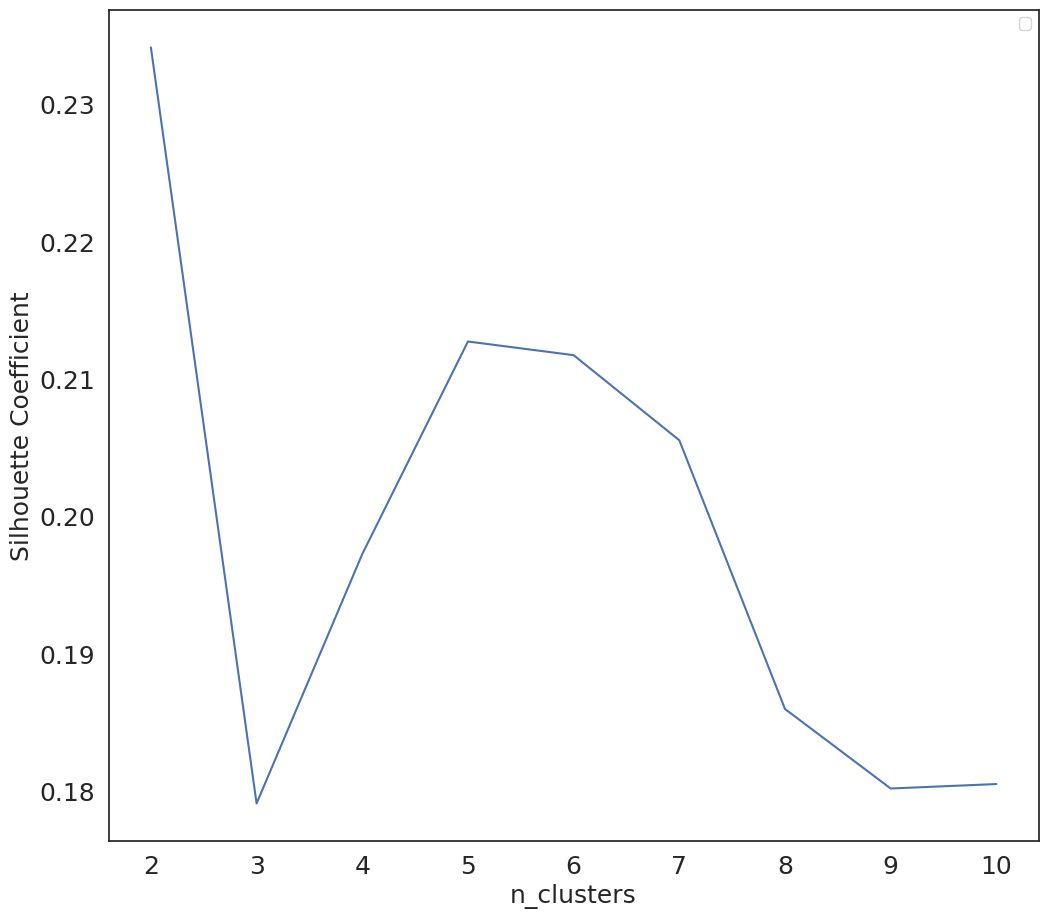

In [14]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
K=range(2,11)
si=[]
for i in K:
    si_labels=cluster.KMeans(n_clusters=i).fit(cd_scale).labels_
    t=metrics.silhouette_score(cd_scale,labels=si_labels)
    si.append(t)

p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
plt.plot(K,si)
plt.legend()
plt.tick_params(labelsize=fs)
plt.xlabel('n_clusters',fontsize=fs)
plt.ylabel('Silhouette Coefficient',fontsize=fs)
#plt.savefig(f'./fig/Kmeans_Silhouette_Coefficient.png',bbox_inches='tight',dpi=100,pad_inches=0.5)
plt.show()

#K-means clustering algo

K-means groups similar data points together into clusters by minimizing the mean distance between geometric points.

In [15]:
def MLlabel(labels,observe=df['repeater_name']):
    maxlb=np.max(labels)
    num=pd.DataFrame(columns=np.arange(0,maxlb+1),index=['rp_num','sum_num','rp_ratio'])
    for i in range(0,maxlb+1):
        n=np.sum((labels==i))
        num.loc['sum_num',i]=n
        r=np.sum((labels==i)&(observe=='repeater'))
        num.loc['rp_num',i]=r
    num.loc['rp_ratio',:]=num.loc['rp_num',:]/num.loc['sum_num',:]
    cf=num.sort_values(by='rp_ratio',axis=1)

    new=np.arange(0,maxlb+1)
    old=cf.columns
    new_labels=labels
    for i in range(len(labels)):
        if (labels[i] in new):
            new_labels[i]=new[labels[i]==old]
    cf.columns=new

    return new_labels

<ipython-input-15-dfcf490b522d>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_labels[i]=new[labels[i]==old]
<ipython-input-16-318fd84e77bc>:9: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['_','Non-repeater Cluster','Repeater Cluster'],fontsize=fs-2)


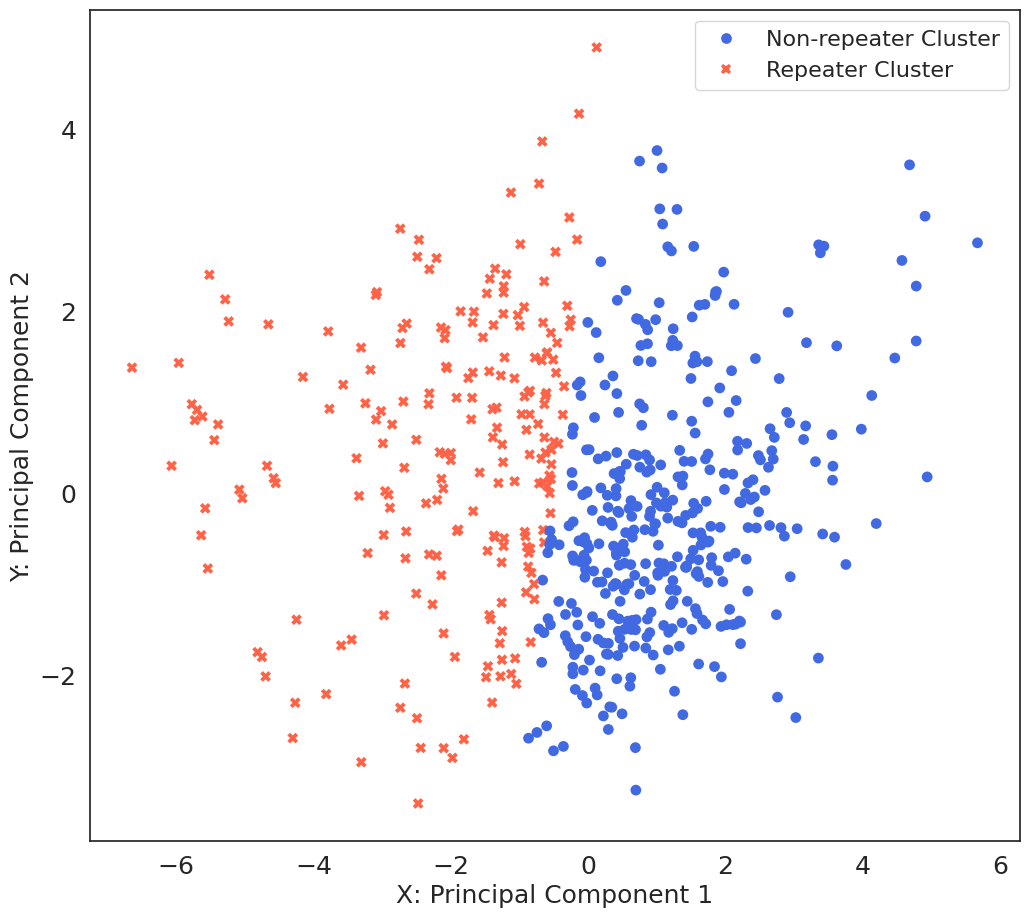

In [16]:
kmeans = KMeans(n_clusters=2,random_state=4)
kmeans = kmeans.fit(pca_cf.loc[:,['x','y']])
p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})

pca_cf['k_Clusters'] = MLlabel(kmeans.labels_)
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue = 'k_Clusters',data=pca_cf,linewidth=0,palette=color,style='k_Clusters',s=s)
plt.legend(['_','Non-repeater Cluster','Repeater Cluster'],fontsize=fs-2)
#plt.title('PCA with K-means',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlabel('X: Principal Component 1',fontsize=fs)
plt.ylabel('Y: Principal Component 2',fontsize=fs)
plt.savefig(f'./fig/PCA_Kmeans',bbox_inches='tight',dpi=100,pad_inches=0.1)

In [25]:
!pip install umap

In [17]:
pip install umap-learn

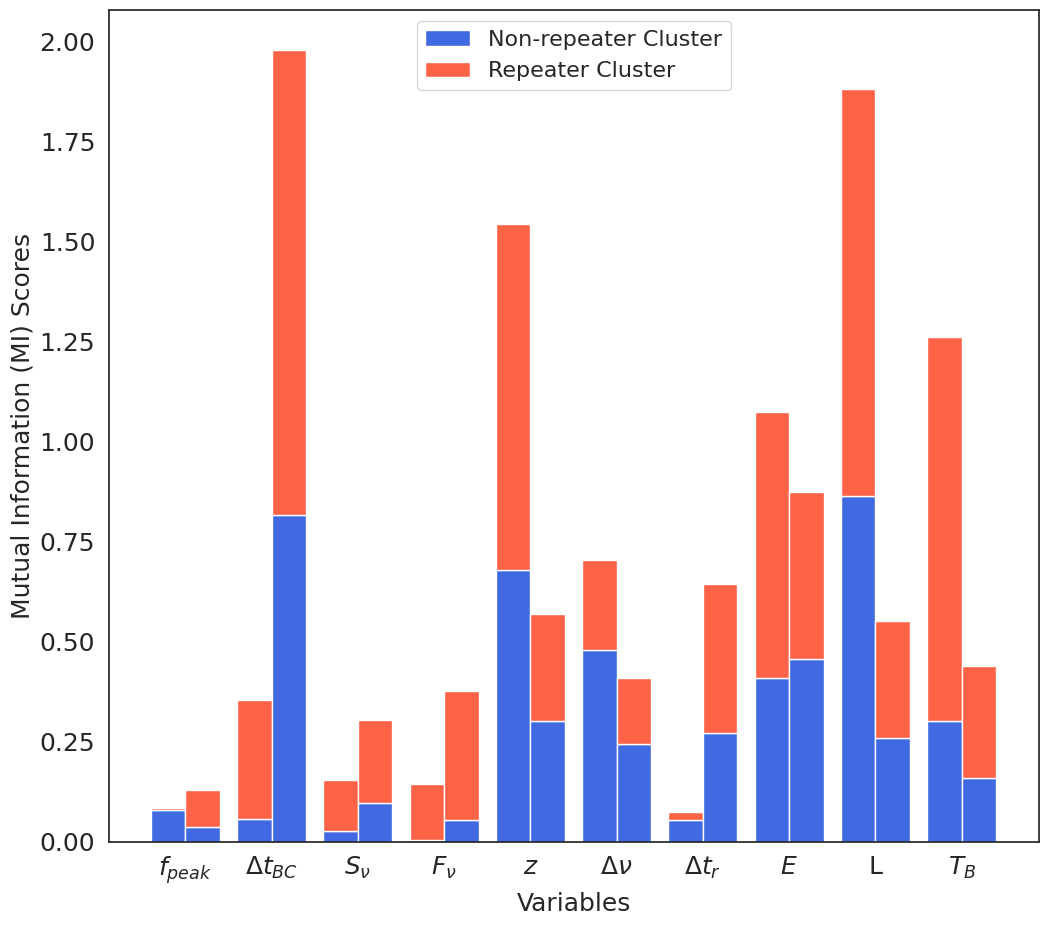

In [18]:
from unml import get_mi_score

p=12
#'fre_width','peak_freq','log_bc_width','log_flux', 'log_fluence','redshift','log_energy', 'log_in_duration','log_luminosity','log_T_B'
colx=[r'$f_{peak}$',r'$\Delta t_{BC}$',r'$S_{\nu} $',r'$F_{\nu} $',r'$z$',r'$\Delta \nu$',r'$\Delta t_r$',r'$E$',r'L',r'$T_B$']
#col=['peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(colx))
fig,ax=plt.subplots()

mi_score1=get_mi_score(cd_scale,label=0,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='x')
rects1=ax.bar(x-width/2,mi_score1['x'],width,label='x',color=color[0])
mi_score2=get_mi_score(cd_scale,label=1,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='x')
rects1=ax.bar(x-width/2,mi_score2['x'],width,label='x',color=color[1],bottom=mi_score1['x'])

mi_score3=get_mi_score(cd_scale,label=0,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='y')
rects3=ax.bar(x+width/2,mi_score3['y'],width,label='y',color=color[0])
mi_score4=get_mi_score(cd_scale,label=1,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='y')
rects4=ax.bar(x+width/2,mi_score4['y'],width,label='y',color=color[1],bottom=mi_score3['y'])

ax.legend(['Non-repeater Cluster','Repeater Cluster'],loc='best',fontsize=fs-2)
ax.set_xlabel('Variables',fontsize=fs)
ax.set_ylabel('Mutual Information (MI) Scores',fontsize=fs)
#ax.set_yscale('log')
plt.tick_params(labelsize=fs)
ax.set_xticks(x)
ax.set_xticklabels(colx)
plt.savefig(f'./fig/PCA_feature.png',bbox_inches='tight',dpi=100,pad_inches=0.1)

#result of the  project

In [19]:
frb=pd.concat([df[['tns_name','repeater_name']],pca_cf[['k_Clusters']]],axis=1)
frb.columns=['tns_name','repeater','PCA_K-means']
frb.head()

,tns_name,repeater,PCA_K-means
0,FRB20180725A,non-repeater,0
1,FRB20180727A,non-repeater,0
2,FRB20180729A,non-repeater,1
3,FRB20180729B,non-repeater,0
4,FRB20180730A,non-repeater,0


In [20]:
frb.loc[:,'PCA_K-means']=2*frb['PCA_K-means'].values-1
frb.head()

,tns_name,repeater,PCA_K-means
0,FRB20180725A,non-repeater,-1
1,FRB20180727A,non-repeater,-1
2,FRB20180729A,non-repeater,1
3,FRB20180729B,non-repeater,-1
4,FRB20180730A,non-repeater,-1


In [21]:
frb.to_csv(r'PCA_result.csv',index=False)